In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('..\\data\\oscar_current_data_U.json', 'r') as datafile:
    u = json.load(datafile)[0]

with open('..\\data\\oscar_current_data_V.json', 'r') as datafile:
    v = json.load(datafile)[0]

print(u['header'])
print(v['header'])

u_data = u['data']
v_data = v['data']

print(len(u_data))
print(len(v_data))

def magnitude(u, v):
    if (u == None or v == None):
        return 0.0
    return (np.sqrt(pow(u, 2) + pow(v, 2)))

{'discipline': 10, 'disciplineName': 'Oceanographic_products', 'center': -3, 'centerName': 'Earth & Space Research', 'refTime': '2014-01-31T00:00:00.000Z', 'significanceOfRT': 0, 'significanceOfRTName': 'Analysis', 'parameterCategory': 1, 'parameterCategoryName': 'Currents', 'parameterNumber': 2, 'parameterNumberName': 'U_component_of_current', 'parameterUnit': 'm.s-1', 'forecastTime': 0, 'surface1Type': 160, 'surface1TypeName': 'Depth below sea level', 'surface1Value': 15, 'numberPoints': 519480, 'shape': 0, 'shapeName': 'Earth spherical with radius = 6,367,470 m', 'scanMode': 0, 'nx': 1080, 'ny': 481, 'lo1': 20, 'la1': 80, 'lo2': 379.6666666666667, 'la2': -80, 'dx': 0.3333333333333333, 'dy': 0.3333333333333333}
{'discipline': 10, 'disciplineName': 'Oceanographic_products', 'center': -3, 'centerName': 'Earth & Space Research', 'refTime': '2014-01-31T00:00:00.000Z', 'significanceOfRT': 0, 'significanceOfRTName': 'Analysis', 'parameterCategory': 1, 'parameterCategoryName': 'Currents', '

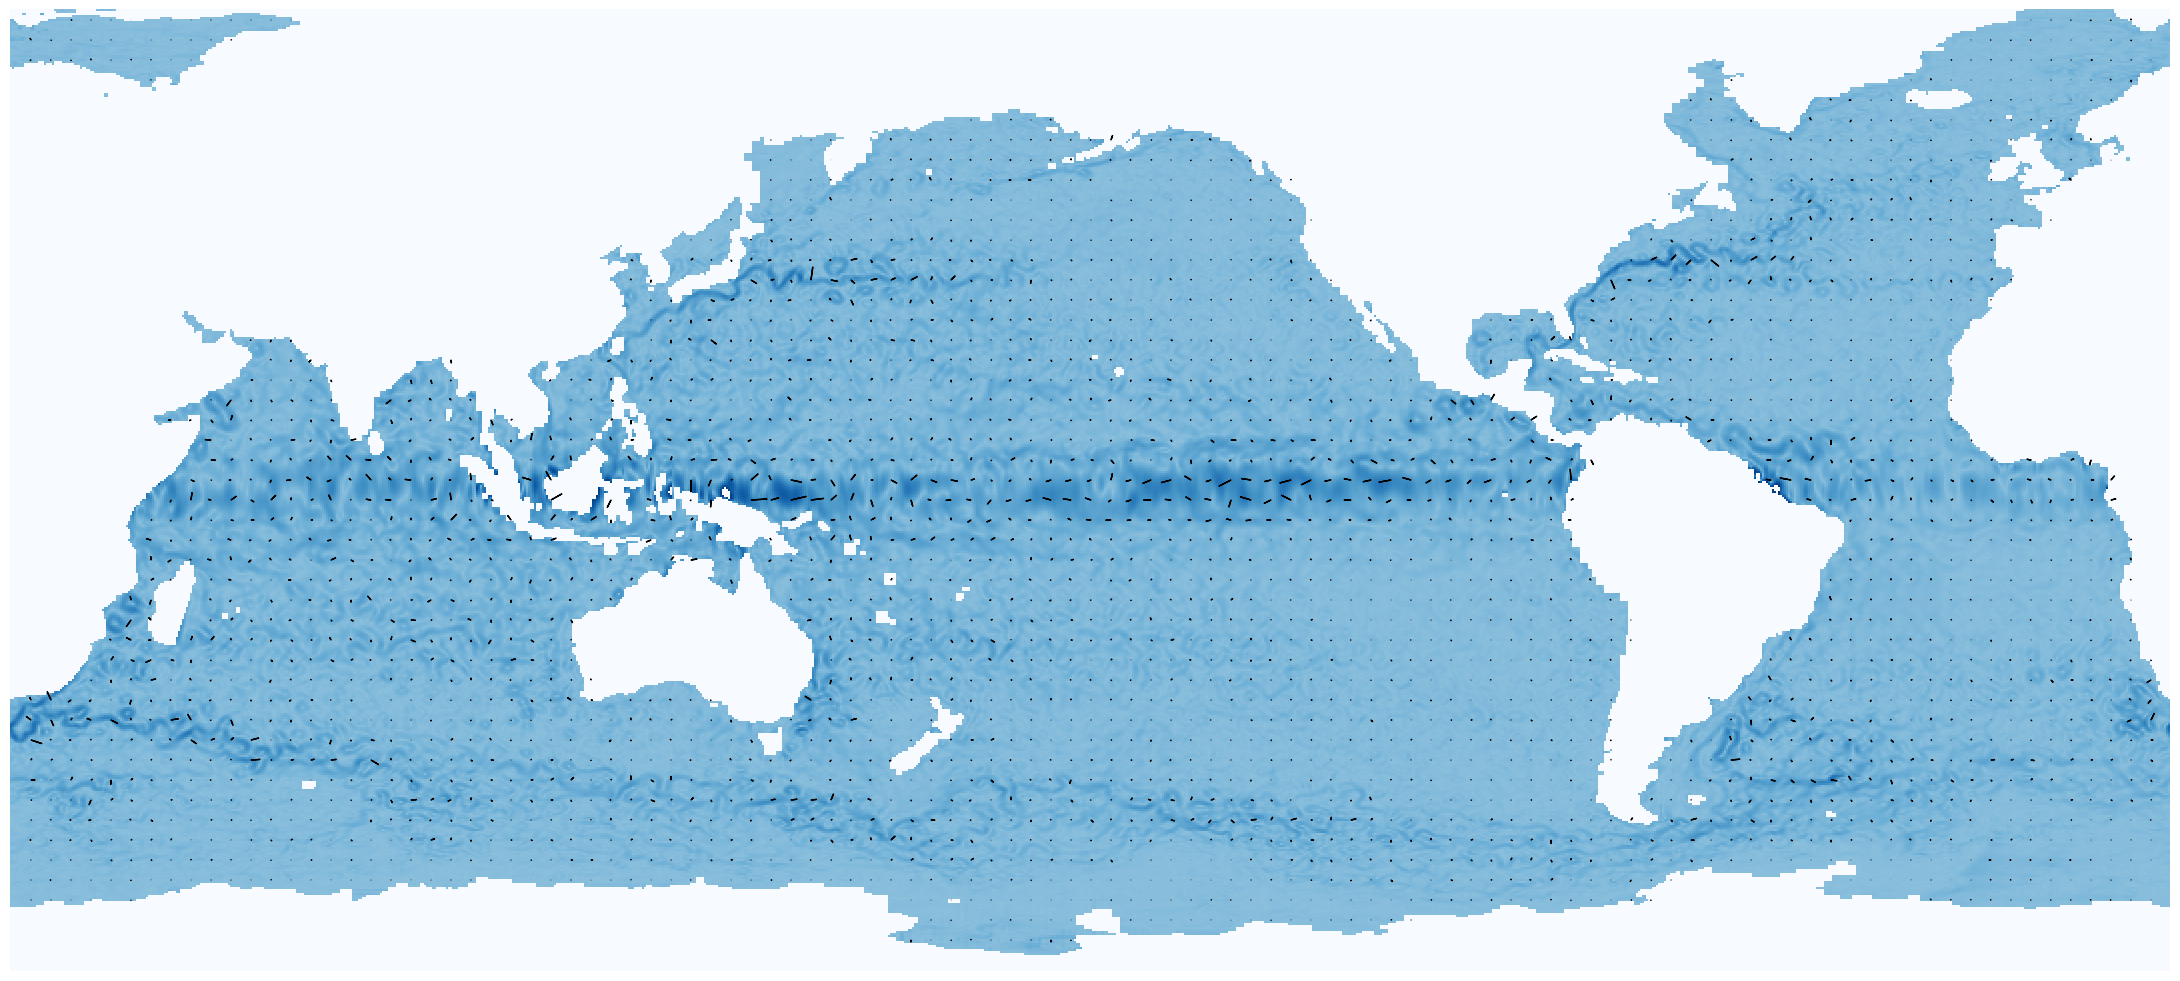

In [13]:
fig, ax = plt.subplots(1, figsize=(21.6, 9.62))

vector_field = np.zeros((481, 1080, 2))
current_magnitudes = np.ones((481, 1080))
is_land = np.zeros((481, 1080))

left_lim = 0
right_lim = 1080
top_lim = 0
bottom_lim = 481

land_x = []
land_y = []

for i in range(len(u_data)):
    c = i % 1080
    r = int(i / 1080)
    if (u_data[i] == None or v_data[i] == None):
        vector_field[r][c] = [0, 0]
        is_land[r][c] = 1
        land_x.append(c)
        land_y.append(r)
        current_magnitudes[r][c] = -.01
        continue
    vector_field[r][c] = [u_data[i], v_data[i]]
    current_magnitudes[r][c] += magnitude(u_data[i], v_data[i])

segment = np.ones((bottom_lim - top_lim, right_lim - left_lim))

for r in range(top_lim, bottom_lim, 1):
    for c in range(left_lim, right_lim, 1):
        segment[r - top_lim][c - left_lim] += current_magnitudes[r][c]

#segment[0][0] = 0.9

ax.imshow(np.log(segment), cmap='Blues')

for r in range(top_lim+5, bottom_lim-5, 10):
    for c in range(left_lim+5, right_lim-5, 10):
        if (is_land[r][c] != 1):
            ax.arrow(c - left_lim+5, r - top_lim, vector_field[r][c][0] * 5, vector_field[r][c][1] * 5, color='black')

plt.axis('off')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0, 0)
plt.savefig("testfig.jpg")
#ax.scatter(land_x, land_y, c='black', s=1)